In [30]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats

sns.set(rc={'figure.figsize':(20, 10)})

In [31]:
with open('EDO_SampleData.csv', 'rb') as f:
    result = chardet.detect(f.read())

In [32]:
data = pd.read_csv('EDO_SampleData.csv', encoding=result['encoding'])

In [33]:
data.columns

Index(['Airing ID', 'Entity Category', 'Entity Name', 'Creative Id',
       'Creative Title', 'Creative URL', 'Network', 'Show Title',
       'Show Episode', 'Show Genre', 'Show Sub Genre', 'Duration',
       'Air Date (ET)', 'Daypart (ET)', 'New Episode', 'Live Event',
       'Special Event', 'Pod ID', 'Pod Order', 'Pod ABMYZ', 'Reach',
       'Impressions', 'Impressions Are Estimated', 'SEV', 'Creative SER',
       'Program SER Index'],
      dtype='object')

In [34]:
len(data.columns)

26

In [35]:
useful_columns = ['Entity Name', 'Network', 'Show Title', 'Show Genre', 'Show Sub Genre', 'Duration', 'Daypart (ET)', 'New Episode', 'Live Event', 'Special Event', 'Pod ABMYZ', 'Creative SER']

In [36]:
data1 = data[useful_columns].dropna(axis=0)

In [37]:
len(useful_columns)

12

## helper functions

In [39]:
def plot():
    pass

# Plottings

## 1. Entity Name

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


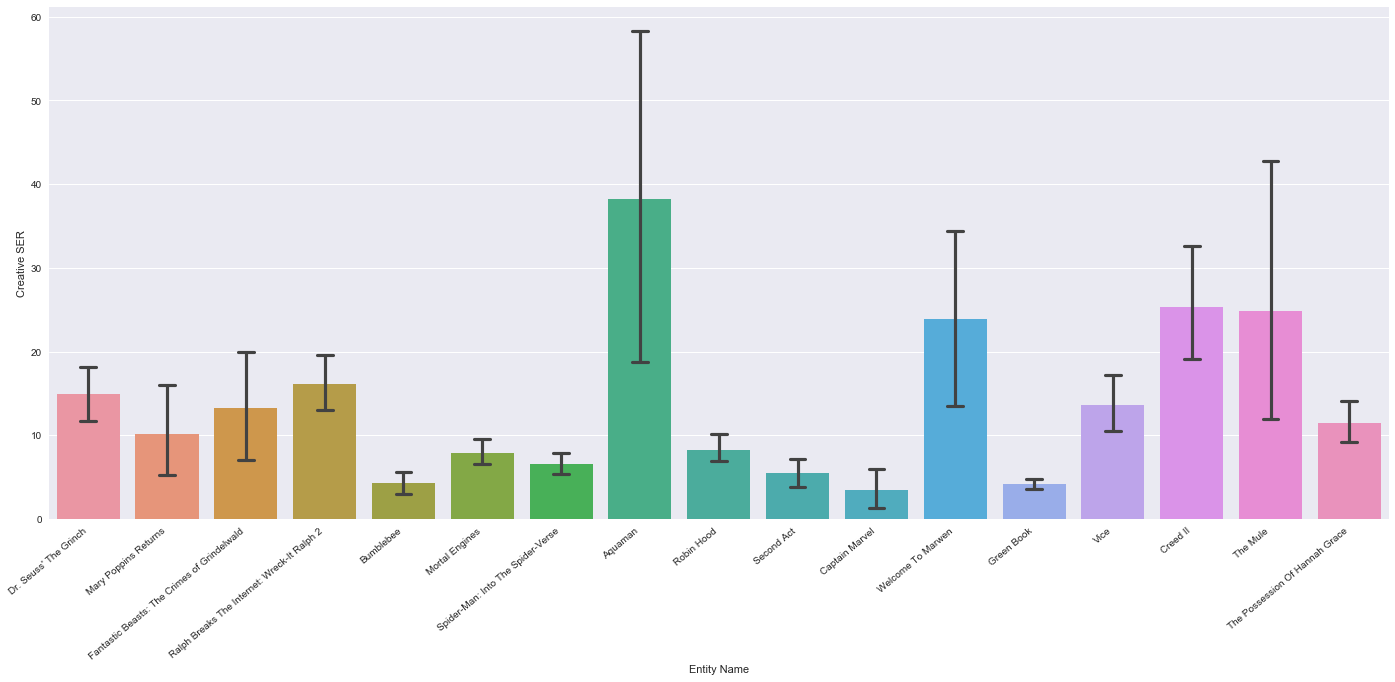

In [40]:
ax = sns.barplot(x="Entity Name", y="Creative SER", data=data1, capsize=.2)
sns.set(font_scale = 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [41]:
X = data1['Entity Name']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X,  drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     6.095
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           3.63e-13
Time:                        11:40:52   Log-Likelihood:                -2466.6
No. Observations:                1313   AIC:                             4967.
Df Residuals:                    1296   BIC:                             5055.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## 2. Network

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


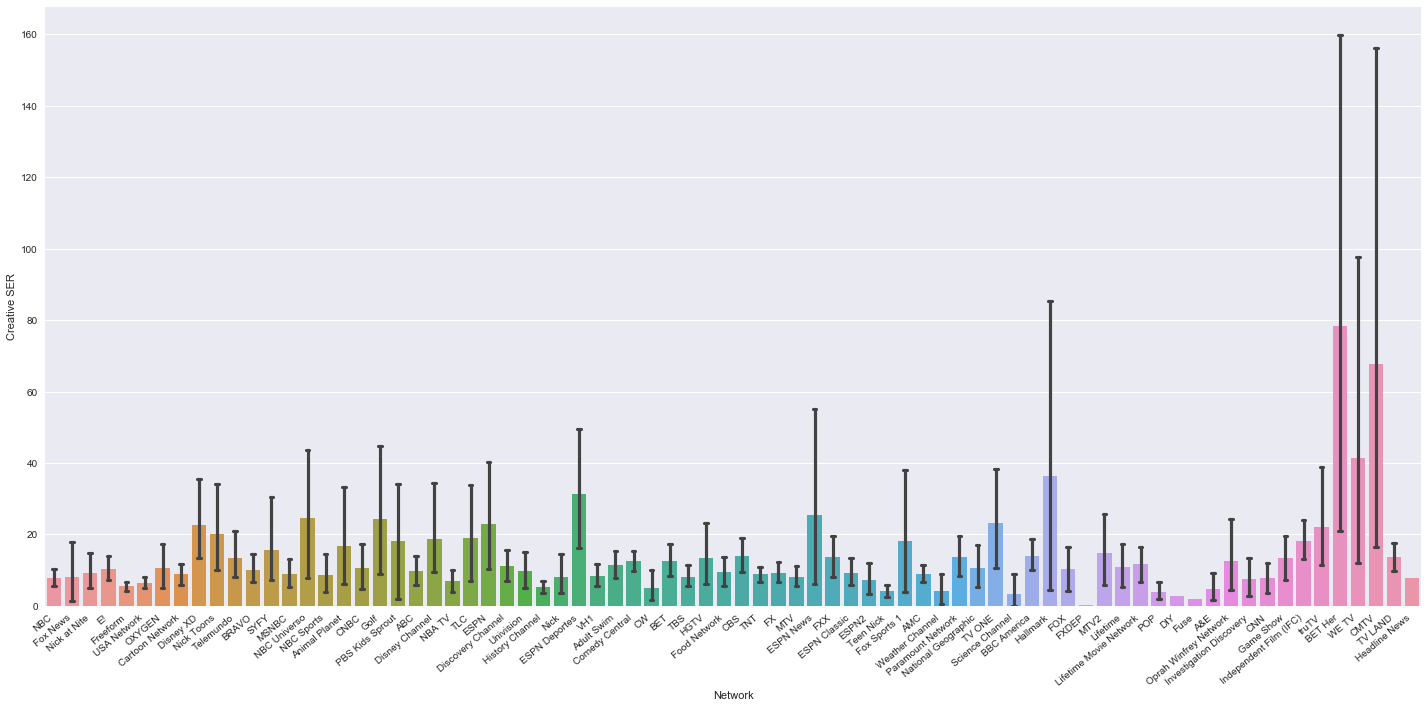

In [18]:
ax = sns.barplot(x="Network", y="Creative SER", data=data1, capsize=.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [29]:
np.unique(data1['Network'])

array(['A&E', 'ABC', 'AMC', 'Adult Swim', 'Animal Planet', 'BBC America',
       'BET', 'BET Her', 'BRAVO', 'CBS', 'CMTV', 'CNBC', 'CNN', 'CW',
       'Cartoon Network', 'Comedy Central', 'DIY', 'Discovery Channel',
       'Disney Channel', 'Disney XD', 'E!', 'ESPN', 'ESPN Classic',
       'ESPN Deportes', 'ESPN News', 'ESPN2', 'FOX', 'FX', 'FXDEP', 'FXX',
       'Food Network', 'Fox News', 'Fox Sports 1', 'Freeform', 'Fuse',
       'Game Show', 'Golf', 'HGTV', 'Hallmark', 'Headline News',
       'History Channel', 'Independent Film (IFC)',
       'Investigation Discovery', 'Lifetime', 'Lifetime Movie Network',
       'MSNBC', 'MTV', 'MTV2', 'NBA TV', 'NBC', 'NBC Sports',
       'NBC Universo', 'National Geographic', 'Nick', 'Nick Toons',
       'Nick at Nite', 'OXYGEN', 'Oprah Winfrey Network',
       'PBS Kids Sprout', 'POP', 'Paramount Network', 'SYFY',
       'Science Channel', 'TBS', 'TLC', 'TNT', 'TV LAND', 'TV ONE',
       'Teen Nick', 'Telemundo', 'USA Network', 'Univision', 'V

In [42]:
# Partition of the network data:
Major_networks = ['ABC', 'NBC', 'CW', 'CBS', 'FOX']
Sport_networks = ['ESPN', 'ESPN Classic', 'ESPN Deportes', 'ESPN News', 'ESPN2', 'Fox Sports 1', 'Golf', 
                  'NBA TV', 'NBC Sports']


In [47]:
len(data1[data1['Network'].isin(Major_networks)])

51

In [48]:
len(data1[data1['Network'].isin(Sport_networks)])

142

In [118]:
count_plot = data1[['Network', 'Creative SER']].groupby(['Network']).agg(['mean','count'])['Creative SER']['count'].sort_values(ascending=False)

In [119]:
count_plot

Network
Comedy Central             66
USA Network                52
BET                        49
E!                         46
TBS                        45
FX                         40
ESPN Classic               40
BRAVO                      39
Disney Channel             38
ESPN                       38
MTV                        37
Disney XD                  37
VH1                        37
TNT                        36
Telemundo                  36
Discovery Channel          35
Paramount Network          30
History Channel            30
Cartoon Network            29
Adult Swim                 29
Freeform                   26
Nick at Nite               24
SYFY                       23
TV ONE                     22
AMC                        21
OXYGEN                     20
NBC                        20
Lifetime                   19
Univision                  18
ESPN Deportes              17
                           ..
Animal Planet               8
Investigation Discovery     8
A&

In [125]:
count_plot[0:20]

Network
Comedy Central       66
USA Network          52
BET                  49
E!                   46
TBS                  45
FX                   40
ESPN Classic         40
BRAVO                39
Disney Channel       38
ESPN                 38
MTV                  37
Disney XD            37
VH1                  37
TNT                  36
Telemundo            36
Discovery Channel    35
Paramount Network    30
History Channel      30
Cartoon Network      29
Adult Swim           29
Name: count, dtype: int64

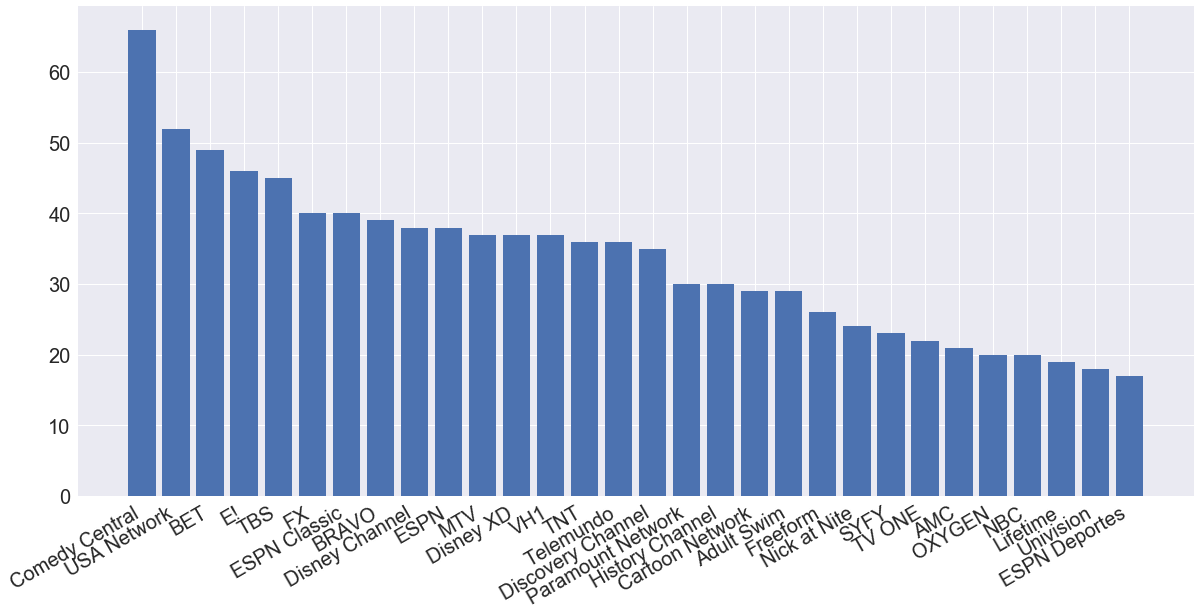

In [129]:
fig, ax1 = plt.subplots()
ax1.bar(count_plot.index[0:30], count_plot[0:30])
fig.autofmt_xdate()

In [130]:
data1[data1['Network']=='Comedy Central']

,Entity Name,Network,Show Title,Show Genre,Show Sub Genre,Duration,Daypart (ET),New Episode,Live Event,Special Event,Pod ABMYZ,Creative SER
187,Ralph Breaks The Internet: Wreck-It Ralph 2,Comedy Central,The Daily Show With Trevor Noah,Entertainment,Talk Show,15.0,Late Fringe,0.0,0.0,0.0,A,3.348901
296,Ralph Breaks The Internet: Wreck-It Ralph 2,Comedy Central,The Daily Show With Trevor Noah,Entertainment,Talk Show,15.0,Late Fringe,0.0,0.0,0.0,M,33.880515
467,Mortal Engines,Comedy Central,The Office,Entertainment,Sitcom,30.0,Early Fringe,0.0,0.0,0.0,M,6.287697
470,Mortal Engines,Comedy Central,South Park,Entertainment,Animated,30.0,Afternoon Daytime,0.0,0.0,0.0,M,6.867340
499,Mortal Engines,Comedy Central,South Park,Entertainment,Animated,30.0,Overnight,0.0,0.0,0.0,A,5.010948
506,Mortal Engines,Comedy Central,The Office,Entertainment,Sitcom,30.0,Early Fringe,0.0,0.0,0.0,Z,9.419057
513,Mortal Engines,Comedy Central,South Park,Entertainment,Animated,30.0,Afternoon Daytime,0.0,0.0,0.0,B,10.967840
518,Mortal Engines,Comedy Central,Futurama,Entertainment,Animated,30.0,Morning Daytime,0.0,0.0,0.0,M,8.899072
550,Spider-Man: Into The Spider-Verse,Comedy Central,Futurama,Entertainment,Animated,30.0,Morning Daytime,0.0,0.0,0.0,B,19.470369
592,Spider-Man: Into The Spider-Verse,Comedy Central,Futurama,Entertainment,Animated,30.0,Morning Daytime,0.0,0.0,0.0,M,10.094194


In [129]:
X = data1['Network']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X,  drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.464
Date:                Mon, 03 Dec 2018   Prob (F-statistic):            0.00724
Time:                        14:38:07   Log-Likelihood:                -2458.4
No. Observations:                1313   AIC:                             5069.
Df Residuals:                    1237   BIC:                             5463.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## 3. Show Genre

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


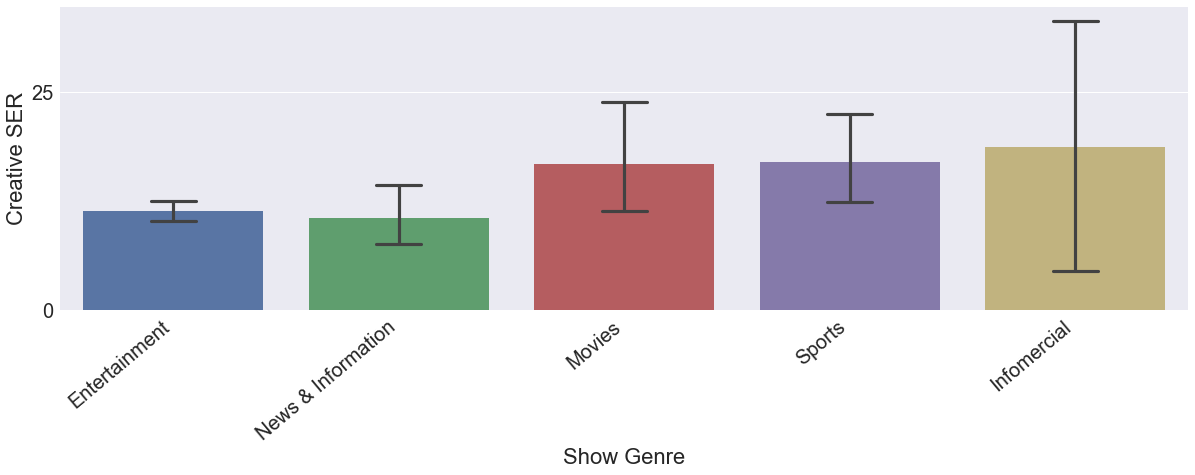

In [79]:
ax = sns.barplot(x="Show Genre", y="Creative SER", data=data1, capsize=.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(font_scale = 10)
plt.tight_layout()

In [128]:
X = data1['Show Genre']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X,  drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8920
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.468
Time:                        14:37:58   Log-Likelihood:                -2512.5
No. Observations:                1313   AIC:                             5035.
Df Residuals:                    1308   BIC:                             5061.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6062      0

## 4. Show Sub Genre

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


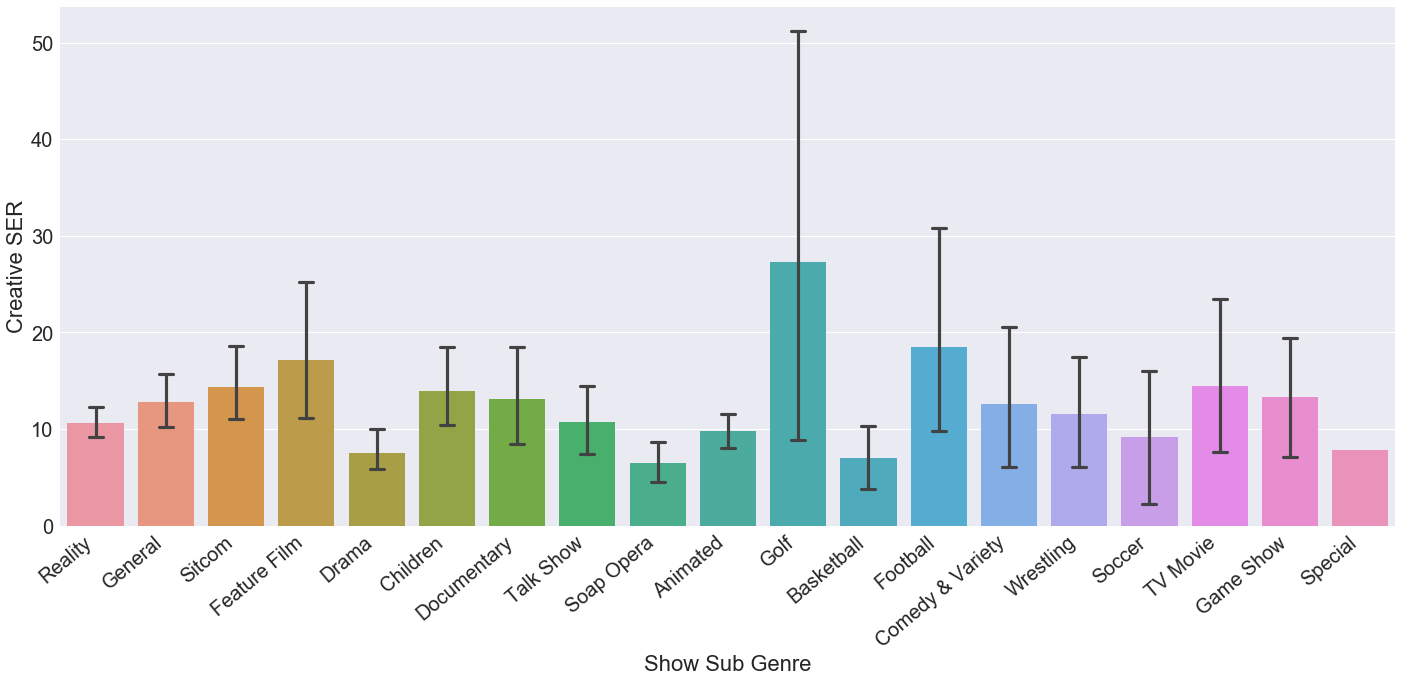

In [83]:
ax = sns.barplot(x="Show Sub Genre", y="Creative SER", data=data1, capsize=.2)
sns.set(font_scale = 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [127]:
X = data1['Show Sub Genre']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X,  drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6476
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.864
Time:                        14:37:48   Log-Likelihood:                -2508.4
No. Observations:                1313   AIC:                             5055.
Df Residuals:                    1294   BIC:                             5153.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7966      0.167  

## 5. Duration

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


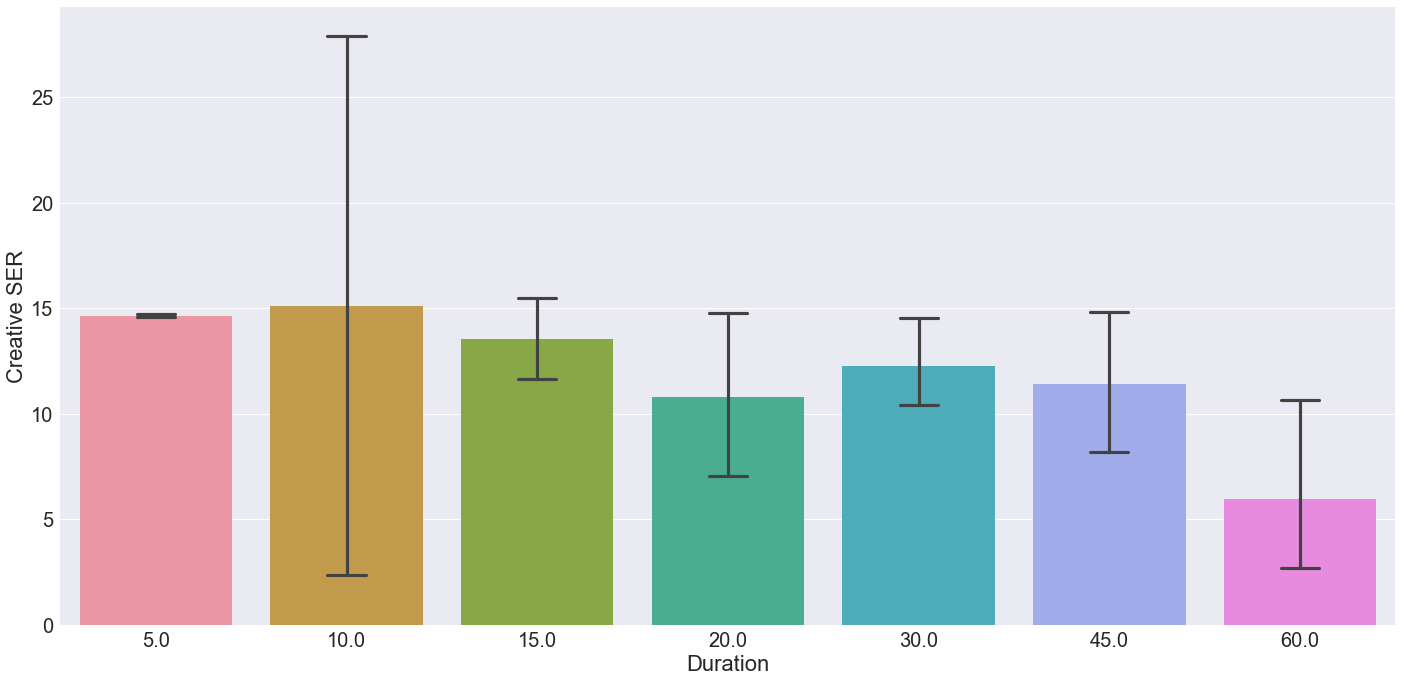

In [86]:
ax = sns.barplot(x="Duration", y="Creative SER", data=data1, capsize=.2)
plt.tight_layout()

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


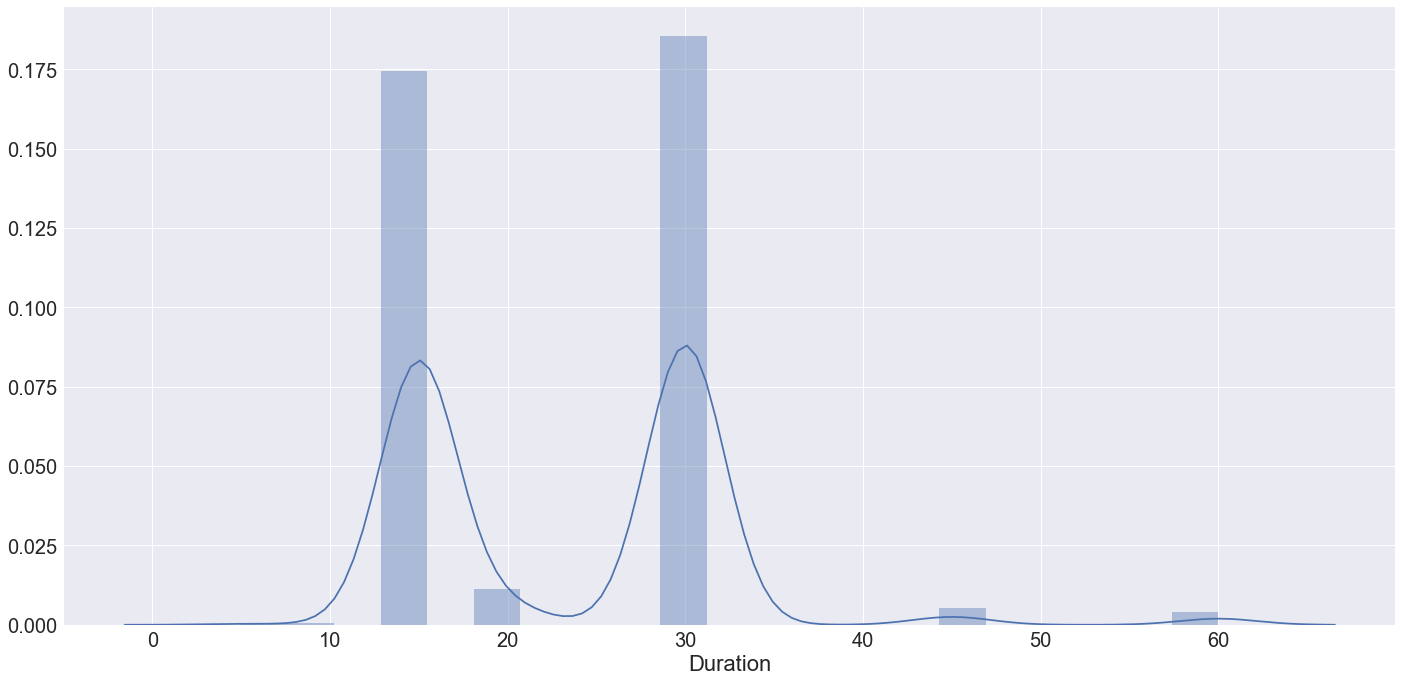

In [152]:
ax = sns.distplot(data1['Duration'])
plt.tight_layout()

In [126]:
X = data1['Duration']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X,  drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9077
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.488
Time:                        14:37:41   Log-Likelihood:                -2511.5
No. Observations:                1313   AIC:                             5037.
Df Residuals:                    1306   BIC:                             5073.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6842      1.162      2.310      0.0

## 6. Daypart (ET)

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


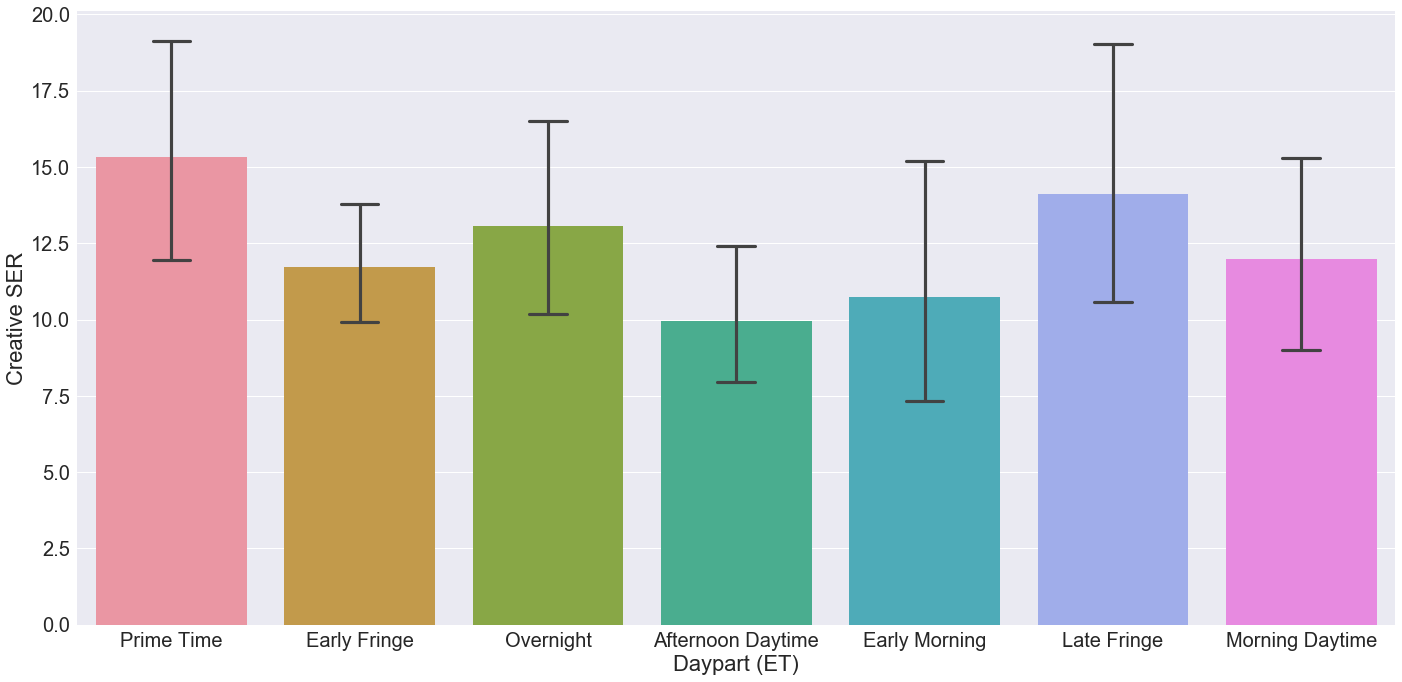

In [87]:
ax = sns.barplot(x="Daypart (ET)", y="Creative SER", data=data1, capsize=.2)
plt.tight_layout()

In [122]:
X = data1['Daypart (ET)']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X, drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6500
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.690
Time:                        14:34:34   Log-Likelihood:                -2512.3
No. Observations:                1313   AIC:                             5039.
Df Residuals:                    1306   BIC:                             5075.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4193      0.04

## 7. New Episode

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


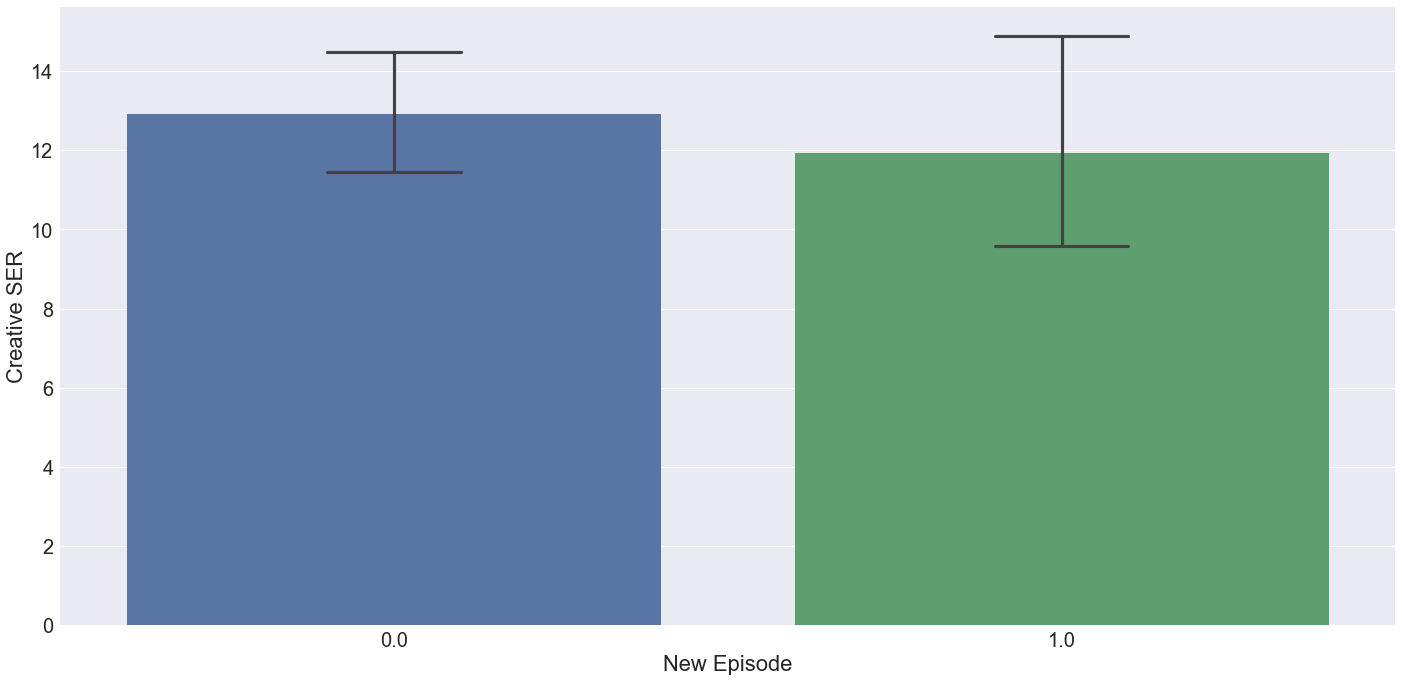

In [88]:
ax = sns.barplot(x="New Episode", y="Creative SER", data=data1, capsize=.2)
plt.tight_layout()


In [124]:
X = data1['New Episode']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X, drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09725
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.755
Time:                        14:37:18   Log-Likelihood:                -2514.2
No. Observations:                1313   AIC:                             5032.
Df Residuals:                    1311   BIC:                             5043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6588      0.051     32.725      0.0

## 8. Live Event

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


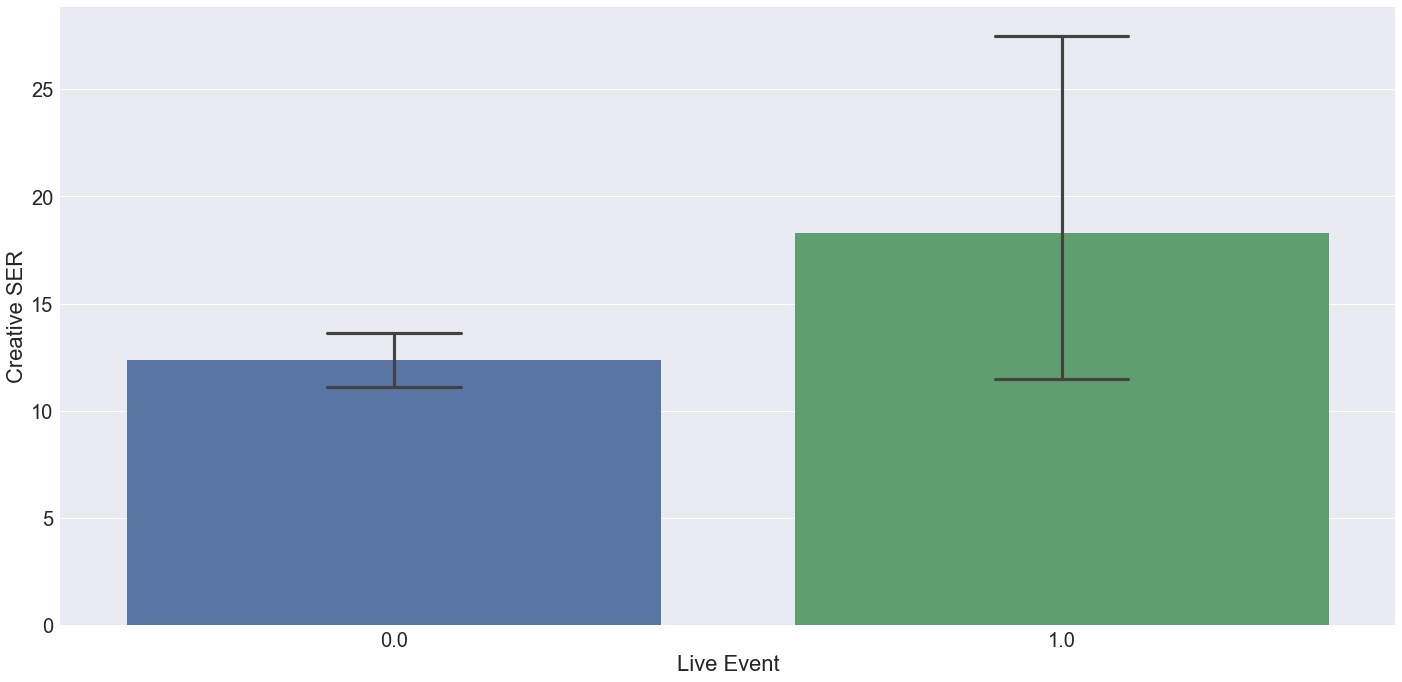

In [89]:
ax = sns.barplot(x="Live Event", y="Creative SER", data=data1, capsize=.2)
plt.tight_layout()

In [71]:
data1[data1['Live Event'] == 0].shape

(1234, 11)

In [72]:
data1[data1['Live Event'] == 1].shape

(79, 11)

In [131]:
X = data1['Live Event']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X, drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.344
Date:                Mon, 03 Dec 2018   Prob (F-statistic):             0.0677
Time:                        14:38:43   Log-Likelihood:                -2512.6
No. Observations:                1313   AIC:                             5029.
Df Residuals:                    1311   BIC:                             5040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6308      0.047     34.904      0.0

## 9. Special Event

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


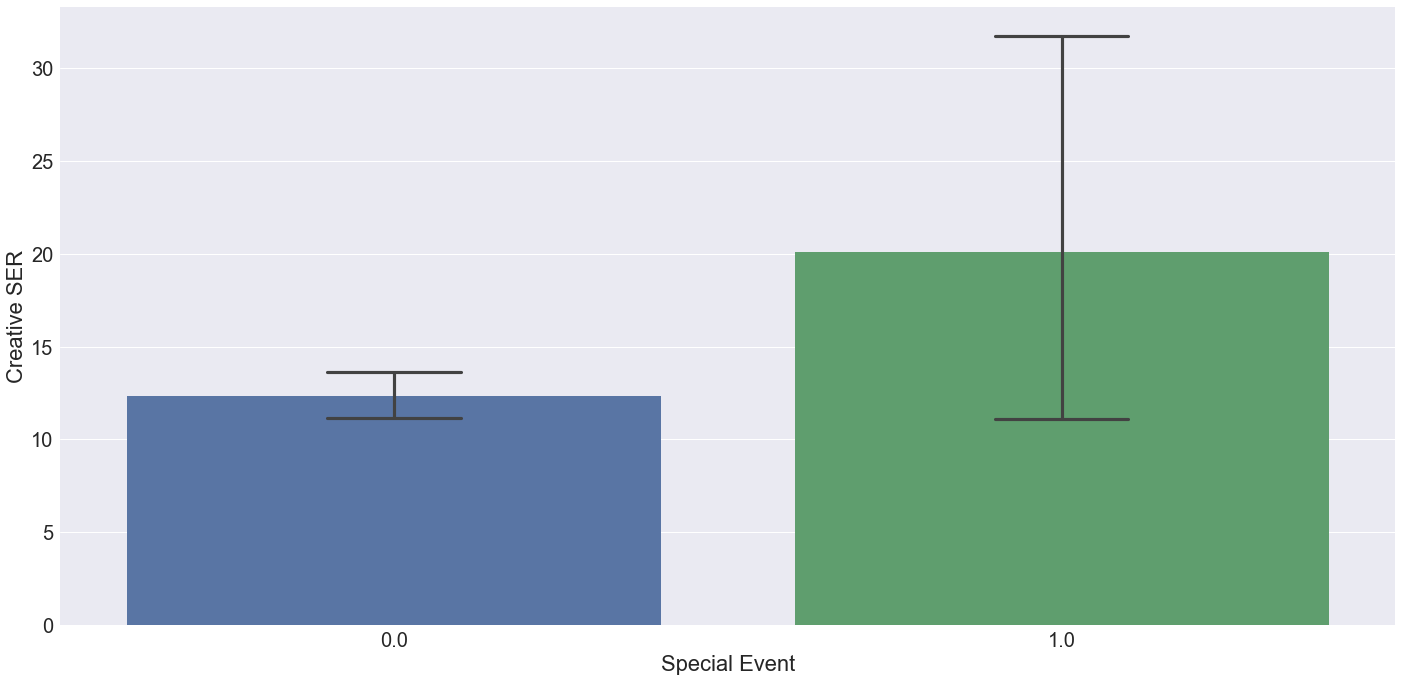

In [90]:
ax = sns.barplot(x="Special Event", y="Creative SER", data=data1, capsize=.2)
plt.tight_layout()

In [66]:
data1[data1['Special Event'] == 0].shape

(1249, 11)

In [68]:
data1[data1['Special Event'] == 1].shape

(64, 11)

In [132]:
X = data1['Special Event']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X, drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5922
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.442
Time:                        14:39:06   Log-Likelihood:                -2513.9
No. Observations:                1313   AIC:                             5032.
Df Residuals:                    1311   BIC:                             5042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6596      0.046     35.700      0.0

## 10. Pod ABMYZ

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


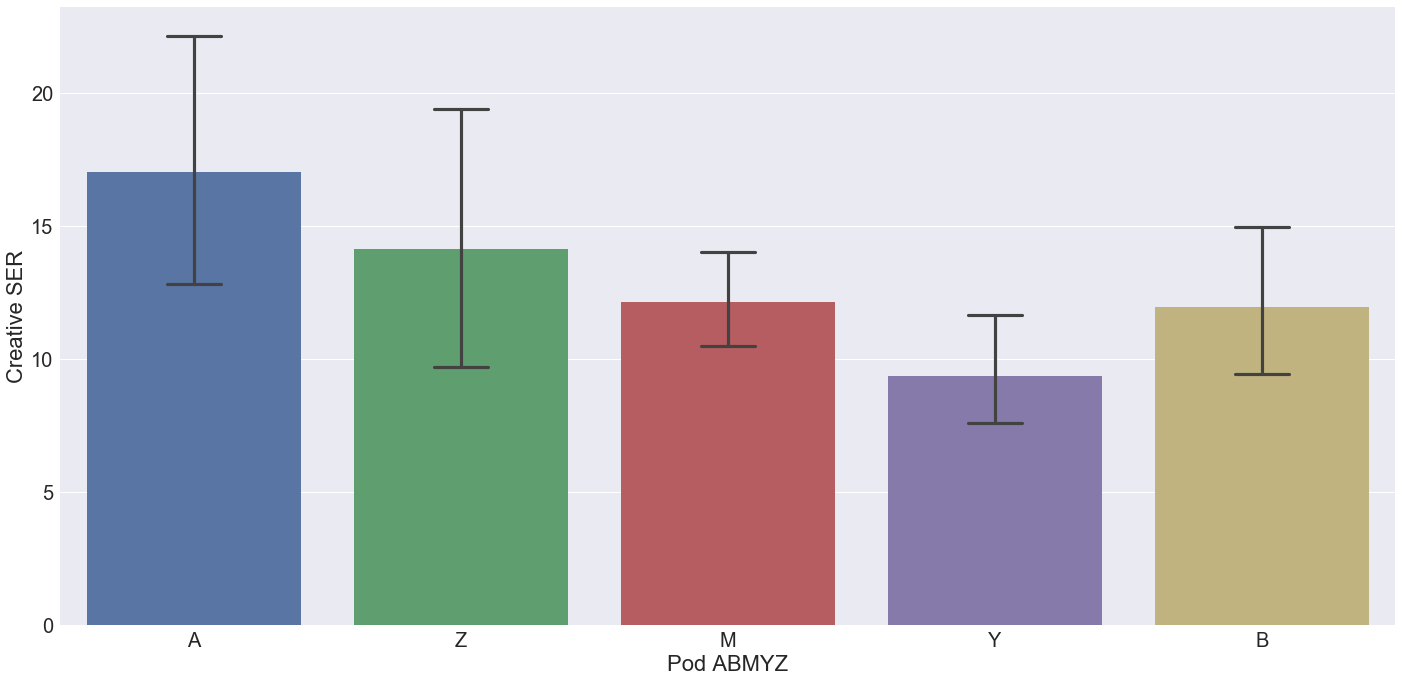

In [91]:
ax = sns.barplot(x="Pod ABMYZ", y="Creative SER", data=data1, capsize=.2)
plt.tight_layout()

In [133]:
X = data1['Pod ABMYZ']
y = np.log(data1['Creative SER'])
X2 = pd.get_dummies(X, drop_first=True)
X2 = sm.add_constant(X2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Creative SER   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.903
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.108
Time:                        14:39:23   Log-Likelihood:                -2510.4
No. Observations:                1313   AIC:                             5031.
Df Residuals:                    1308   BIC:                             5057.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8453      0.119     15.505      0.0

## 11. Distribution of Creative SER

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


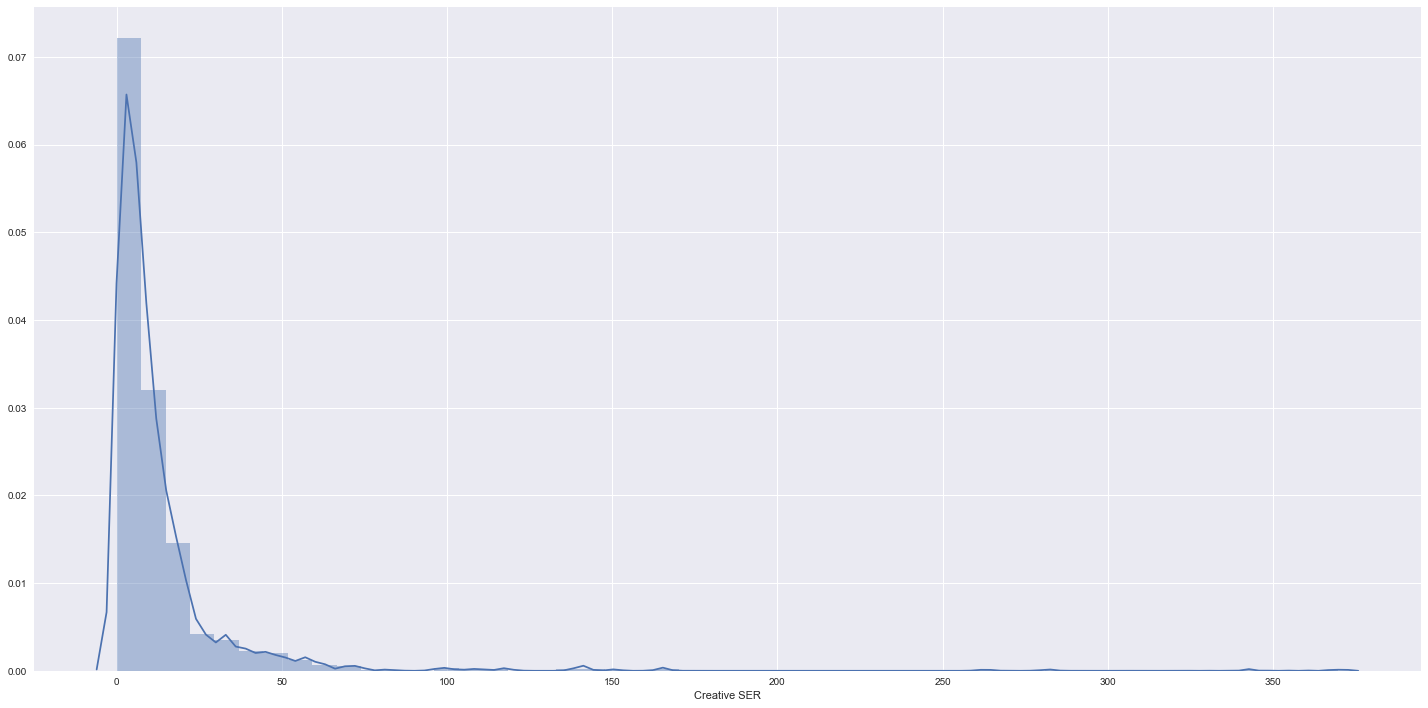

In [76]:
ax = sns.distplot(data1['Creative SER'])
plt.tight_layout()

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


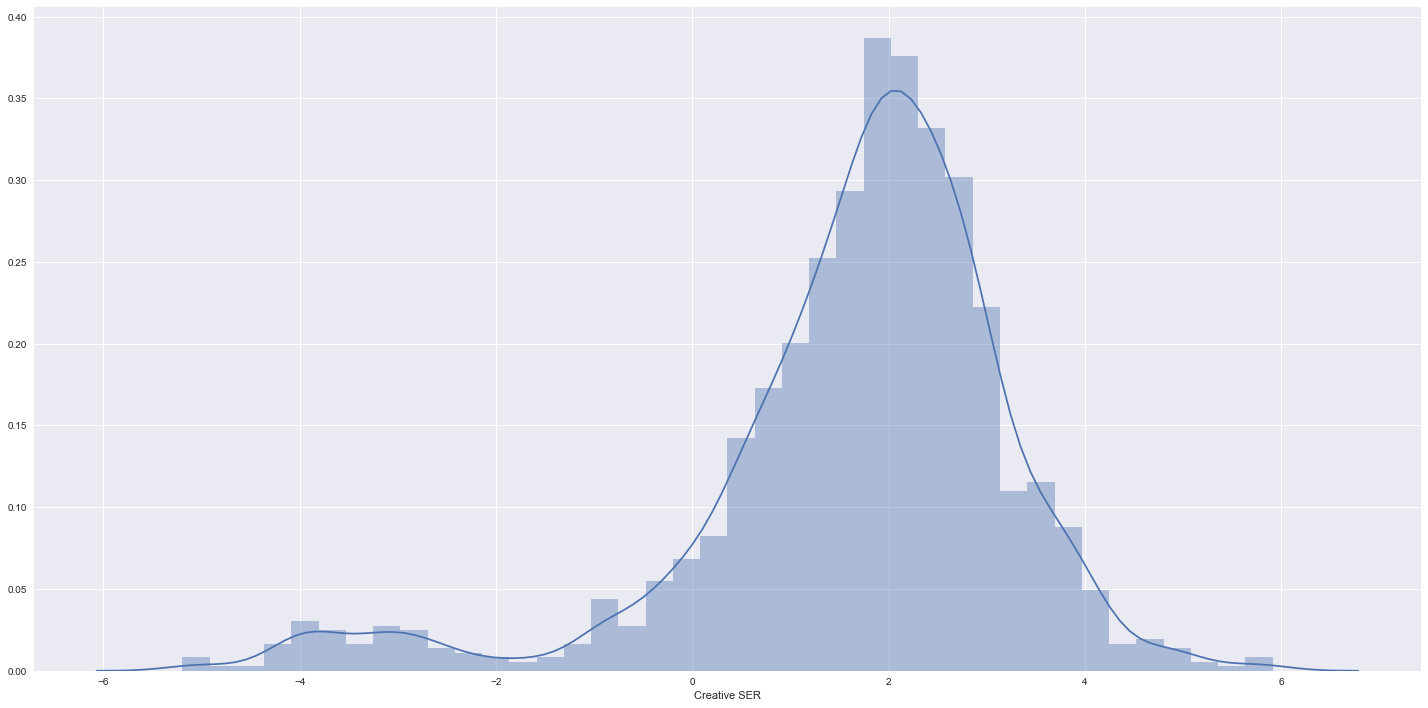

In [77]:
# Log transformation
ax = sns.distplot(np.log(data1['Creative SER']))
plt.tight_layout()

## 12. Entity + Pod ABMYZ

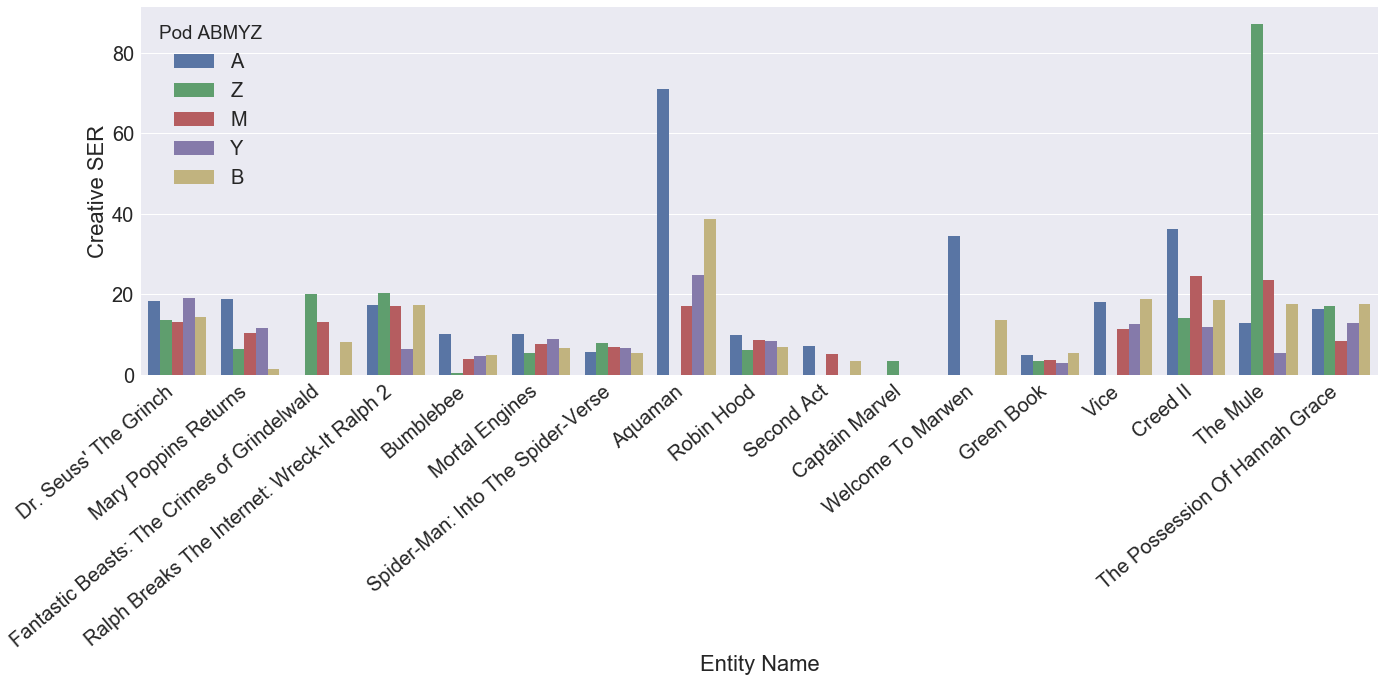

In [96]:
ax = sns.barplot(x="Entity Name", y="Creative SER", hue='Pod ABMYZ', ci=None, data=data1)
sns.set(font_scale = 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

## 13. Show Title

Top 10 shows

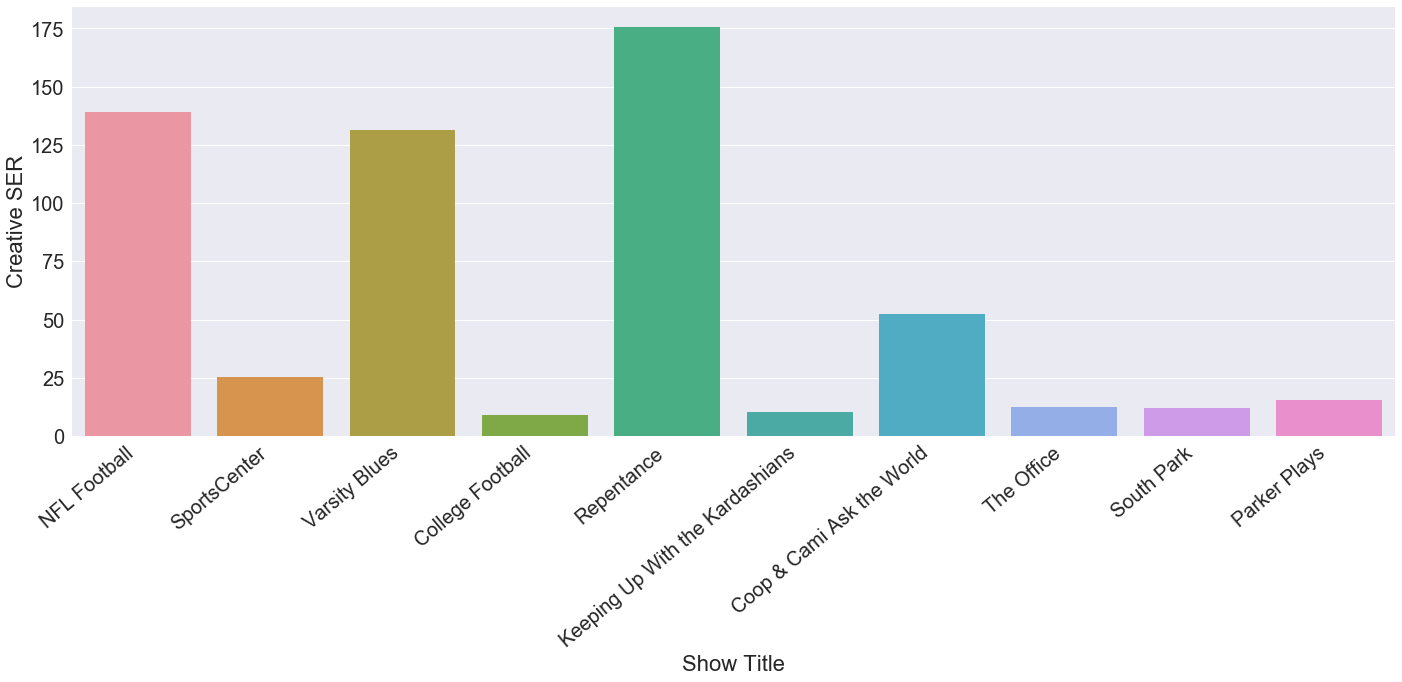

In [149]:
ax = sns.barplot(x="Show Title", y="Creative SER", data=data1, order=grp.iloc[:10].index, ci=None)
sns.set(font_scale = 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [143]:
grp = data1.groupby('Show Title').sum().sort_values(by='Creative SER', ascending=False)

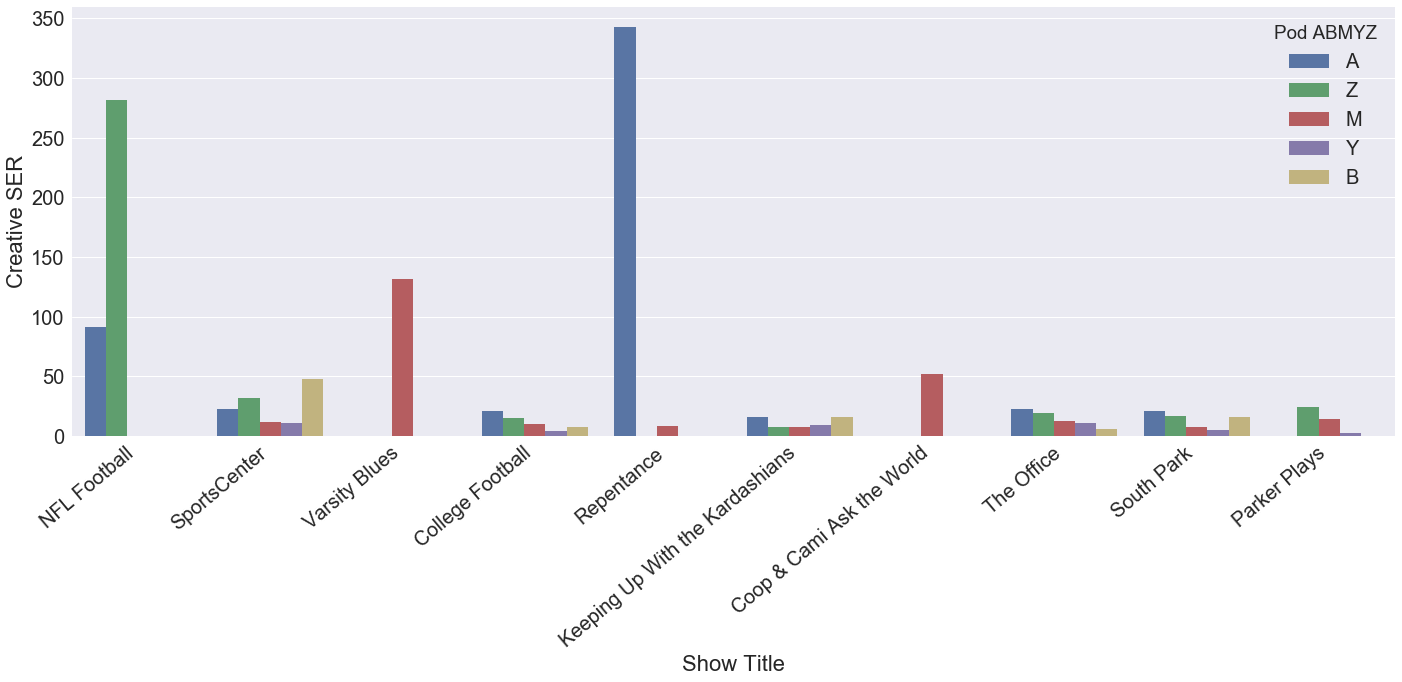

In [146]:
ax = sns.barplot(x="Show Title", y="Creative SER", hue='Pod ABMYZ', data=data1, order=grp.iloc[:10].index, ci=None)
sns.set(font_scale = 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

## 14. Entity Name, Pod ABMYZ and Creative SER

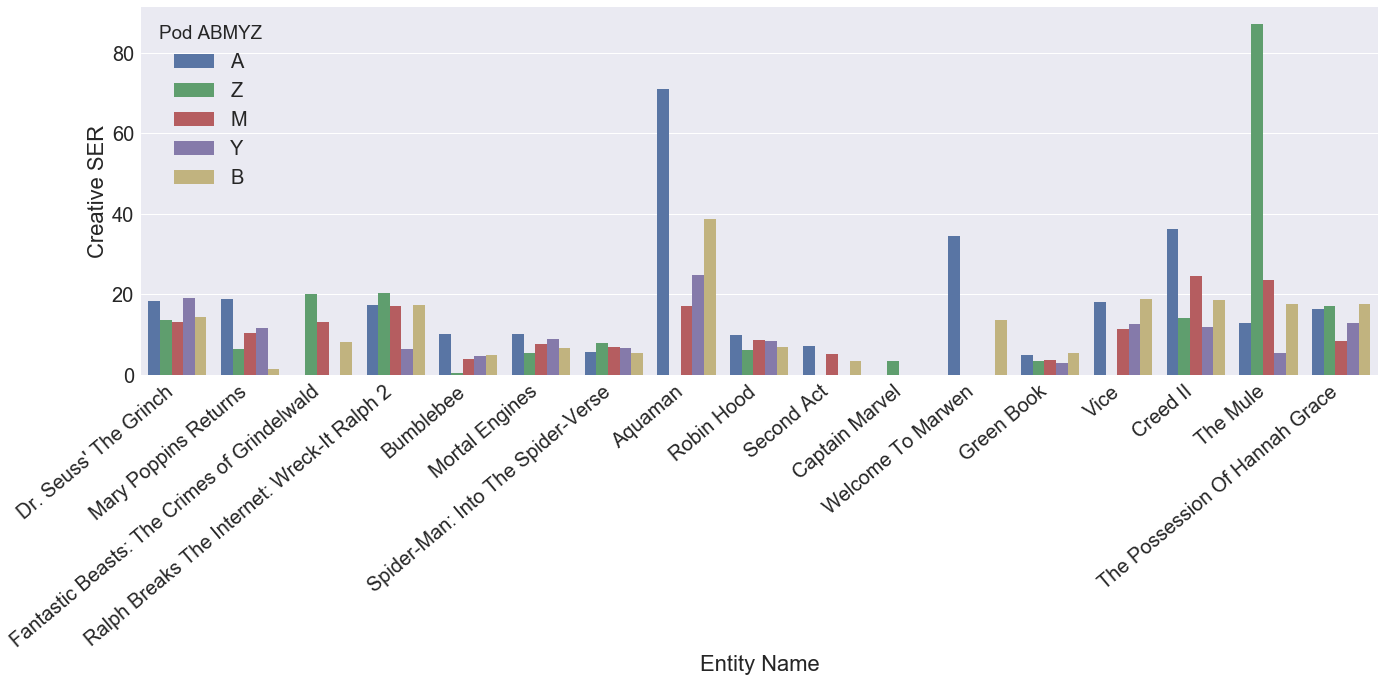

In [148]:
ax = sns.barplot(x="Entity Name", y="Creative SER", hue='Pod ABMYZ', data=data1, ci=None)
sns.set(font_scale = 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

## Ignore network for now and run random forest on other variables.


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [131]:
rf_cols = ['Entity Name', 'Show Genre', 'Duration', 'Daypart (ET)', 'New Episode', 'Live Event', 'Special Event', 'Pod ABMYZ', 'Creative SER']

In [132]:
df = data1[rf_cols]
y = df['Creative SER']
x = df.drop(['Creative SER'], axis=1)
x_dummies = pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, test_size=0.3, random_state = 0)
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [133]:
x_train.shape

(919, 34)

In [134]:
regr.score(x_test, y_test)

0.025429430019783594

In [135]:
regr.score(x_train, y_train)

0.1165489221515641